In [4]:
import json
import pandas as pd
dataset='assistment'
strategy='MFI'
log = json.load(open(f'/data/yutingh/CAT/data/{dataset}/{strategy}/log.json', 'r'))
strategy='MFI'
trait = json.load(open(f'/data/yutingh/CAT/data/{dataset}/{strategy}/trait.json', 'r'))

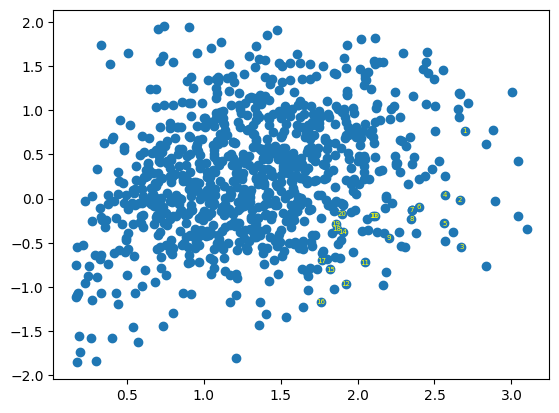

In [5]:
from copy import deepcopy
import matplotlib.pyplot as plt
data = deepcopy(list(trait['item'].values()))
for i in data:
    i.append(0)
df=pd.DataFrame(data, columns=["a", "b", "t"])
fig = plt.figure()
ax = fig.add_subplot()
theta=[]
for t,tmp in enumerate(log[0]):
    for i,row in df.iterrows():
        if row[0]==tmp[1] and row[1]==tmp[2]:
            theta.append(tmp[0])
            df.iloc[i,2]=t
            ax.text(row[0], row[1], '%d' % (t+1), ha='center', va='center', fontdict={'fontsize': 5},color='yellow')
            break
df = df.sort_values(by=['t'])
plt.scatter(df['a'], df['b'])
plt.show()    
# plt.plot(list(range(1,21)), theta)

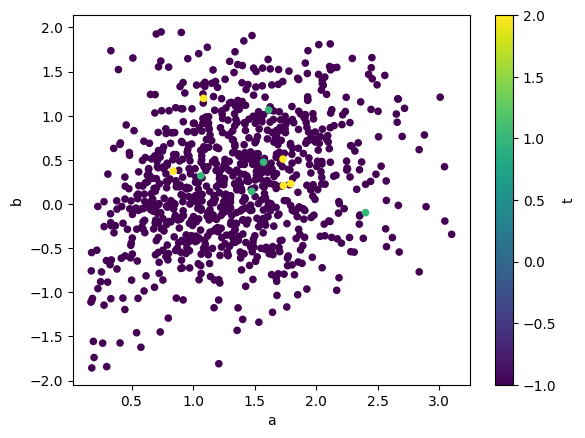

In [6]:
thetas=[0.,0.2,0.4,0.6,0.8,1.0]
k_infos=[[464, 95, 120, 432, 637, 167, 357, 215, 560, 151, 455, 119, 453, 540, 238, 89, 542, 222, 479, 433, 649, 550, 80, 105, 192, 402, 168, 461, 196, 146, 329, 532, 665, 159, 362, 31, 127, 48, 1, 284, 686, 197, 534, 34, 49, 199, 648, 366, 417, 641], [464, 95, 432, 120, 119, 560, 455, 215, 637, 192, 89, 196, 542, 362, 540, 550, 479, 238, 34, 453, 371, 48, 402, 105, 151, 357, 80, 665, 649, 159, 146, 222, 232, 329, 433, 197, 199, 167, 168, 545, 534, 417, 49, 641, 102, 532, 403, 509, 64, 46], [464, 432, 119, 95, 362, 196, 192, 560, 455, 34, 371, 215, 89, 542, 120, 550, 540, 232, 479, 509, 48, 490, 637, 45, 665, 402, 242, 199, 619, 668, 403, 238, 159, 197, 105, 106, 545, 453, 255, 155, 146, 257, 64, 274, 87, 641, 417, 80, 329, 46], [362, 119, 371, 196, 34, 432, 192, 490, 509, 464, 560, 106, 45, 95, 232, 455, 242, 619, 89, 215, 257, 668, 542, 48, 550, 403, 185, 140, 87, 540, 19, 169, 479, 155, 255, 328, 665, 199, 402, 197, 274, 545, 487, 160, 159, 634, 46, 417, 120, 157], [62, 362, 106, 490, 371, 34, 509, 196, 45, 119, 242, 192, 257, 619, 232, 432, 185, 140, 668, 169, 19, 87, 560, 328, 403, 455, 48, 157, 487, 17, 89, 155, 255, 542, 95, 215, 297, 274, 550, 320, 430, 464, 199, 665, 545, 634, 197, 540, 479, 42], [106, 490, 362, 371, 509, 242, 45, 34, 257, 185, 619, 17, 196, 140, 169, 19, 232, 192, 119, 668, 328, 87, 157, 297, 487, 403, 432, 320, 155, 430, 560, 48, 255, 312, 274, 42, 455, 271, 29, 126, 286, 89, 0, 634, 447, 316, 199, 542, 197, 605]]
data = deepcopy(list(trait['item'].values()))
for i in data:
    i.append(-1)
df=pd.DataFrame(data, columns=["a", "b", "t"])

a = set(k_infos[0][:5])
b = set(k_infos[-1][:5])
selected = a.union(b)
a_diff =a-b
b_diff = b-a
unselected = set(range(len(data)))-selected
target=[0]*len(data)
for i,row in df.iterrows():
    if i in a_diff:
        df.iloc[i,2]=1
    elif i in b_diff:
        df.iloc[i,2]=2
df = df.sort_values(by=['t'],)
df.plot.scatter(x='a', y='b',c='t',cmap="viridis")
plt.show()    
